# TP: Introduction à Pytorch

## Partie A : exercices 
### Exercice 1 : Manipulation de Tenseurs

**Objectif :**  
Se familiariser avec les dimensions des tenseurs et les opérations matricielles sous **PyTorch**.

1. Créer un tenseur **A** de taille `(5, 3)` contenant des valeurs aléatoires tirées d’une loi normale.
2. Créer un tenseur **B** de taille `(3, 2)` rempli de uns.
3. Calculer le produit matriciel **C = A × B**.
4. Afficher la dimension (*shape*) du tenseur **C**.
5. Transposer le tenseur **C** et expliquer l’impact de cette opération sur la mémoire.



In [256]:
import matplotlib.pyplot as plt
import numpy as np

In [257]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

2.5.1+cu121
12.1
True
NVIDIA GeForce RTX 3060 Laptop GPU


In [258]:
A = torch.randn(5, 3)

B = torch.ones(3, 2)

C = torch.matmul(A, B)
C.shape

torch.Size([5, 2])

lazy transpose / view.

In [259]:
C_T = C.T
C_T

tensor([[ 2.5441,  0.6313,  3.4182,  3.3647, -0.2806],
        [ 2.5441,  0.6313,  3.4182,  3.3647, -0.2806]])

In [260]:
C_T[0, 0] = 999
print(C[0, 0])  # тоже 999

tensor(999.)



### Exercice 2: 

1. Créer un tenseur nommé `mon_tenseur` contenant une séquence d’entiers de 0 à 23 inclus, en utilisant la fonction `arange`.

2. Redimensionner ce tenseur afin qu’il prenne la forme de 4 lignes et 6 colonnes.

3. Afficher :
   - la taille du tenseur,
   - le type de données associé.

4. Multiplier l’ensemble des valeurs du tenseur par **10**, puis afficher le résultat final.




In [261]:
mon_tens = torch.arange(24)
mon_tens = mon_tens.reshape(4, 6)
mon_tens.size(), mon_tens.shape, mon_tens.type()

(torch.Size([4, 6]), torch.Size([4, 6]), 'torch.LongTensor')

In [262]:
mon_tens = mon_tens * 10
mon_tens

tensor([[  0,  10,  20,  30,  40,  50],
        [ 60,  70,  80,  90, 100, 110],
        [120, 130, 140, 150, 160, 170],
        [180, 190, 200, 210, 220, 230]])

### Exercice 3 : Calcul de Gradient avec Autograd

Soit la fonction scalaire suivante :

\[
y = 3x^2 + 2x + 1
\]

1. Définir un tenseur `x = 2.0` en activant le suivi du gradient (`requires_grad=True`).
2. Implémenter l’équation de `y`.
3. Utiliser la méthode `.backward()` pour calculer les gradients.
4. Extraire et afficher la valeur de \(\frac{dy}{dx}\) stockée dans `x.grad`.



In [263]:
x = torch.tensor([2.0], requires_grad=True)

y = (3 * (x ** 2)) + 2 * x + 1
y.backward()

print("x:", x.item())
print("y:", y.item())
print("dy/dx:", x.grad.item())

x: 2.0
y: 17.0
dy/dx: 14.0



### Exercice 4 : Architecture de Réseau de Neurones

En utilisant le module **torch.nn**, créer une classe `SimpleNet` :

1. La couche d’entrée doit accepter **10 caractéristiques**.
2. Une couche cachée de **5 neurones** avec une activation **ReLU**.
3. Une couche de sortie de **1 neurone** (régression).
4. Instancier le modèle et effectuer un **forward pass** sur un vecteur aléatoire.

In [264]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [265]:
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        # Couche cachée: 10 -> 5
        self.hidden = nn.Linear(10, 5)
        # Couche de sortie: 5 -> 1
        self.output = nn.Linear(5, 1)
    
    def forward(self, x):
        x = F.relu(self.hidden(x))  # Activation ReLU
        x = self.output(x)           # Sortie
        return x

In [266]:
model = SimpleNet()

x_input = torch.randn(1, 10)   # 1 échantillon, 10 caractéristiques
y_pred = model(x_input)


print("Input:", x_input)
print("Predicted output:", y_pred)

Input: tensor([[ 0.1692,  1.4220,  1.7011, -1.7847, -0.2249, -1.7099, -0.7439,  0.0437,
          0.9977, -1.9001]])
Predicted output: tensor([[-0.5992]], grad_fn=<AddmmBackward0>)


---

## Partie B:
**Classification d'images avec le dataset CIFAR-10**

Le dataset CIFAR-10 contient 60 000 images réparties sur 10 classes différentes, chacune avec 6 000 images de taille 32x32 pixels.
Ces classes sont : avions, automobiles, oiseaux, chats, cerfs, chiens, grenouilles, chevaux, navires et camions.

`classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')`

L'objectif de ce TP est de mettre en place un modèle de classification d'images dans l'environnement PyTorch.

Plan du TP
- 1) Charger les données CIFAR-10 avec PyTorch.
- 2) Préparer les données.
- 3) Créer un modèle simple de réseau de neurones convolutionnel (CNN).
- 4) Entraîner ce modèle sur les données CIFAR-10.
- 5) Évaluer la performance du modèle


In [267]:
import torch
import torchvision
import torchvision.transforms as transforms

# Convertir en tensor et normaliser + data augmentation
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        (0.4914, 0.4822, 0.4465),
        (0.2023, 0.1994, 0.2010)
    )
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        (0.4914, 0.4822, 0.4465),
        (0.2023, 0.1994, 0.2010)
    )
])

# Télécharger les datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)


trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.71453285..1.8768656].


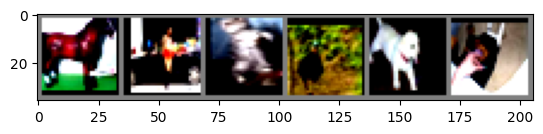

Labels: ['horse', 'car', 'cat', 'bird', 'dog', 'dog']


In [268]:

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # dénormaliser
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Obtenir quelques images d'un batch
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Afficher les 4 premières images
imshow(torchvision.utils.make_grid(images[:6]))
print('Labels:', [classes[labels[j]] for j in range(6)])

In [269]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR

In [270]:
class CIFAR10Net(nn.Module):
    def __init__(self):
        super(CIFAR10Net, self).__init__()

        # Convolutional blocks 
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1   = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2   = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3   = nn.BatchNorm2d(128)

        # Pooling
        self.pool = nn.MaxPool2d(2, 2)

        # Fully connected 
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.bn_fc = nn.BatchNorm1d(256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Block 1: 32x32 → 16x16
        x = self.pool(F.relu(self.bn1(self.conv1(x))))

        # Block 2: 16x16 → 8x8
        x = self.pool(F.relu(self.bn2(self.conv2(x))))

        # Block 3: 8x8 → 4x4
        x = self.pool(F.relu(self.bn3(self.conv3(x))))

        # Flatten
        x = x.view(x.size(0), -1)

        # FC
        x = F.relu(self.bn_fc(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)  # logits

        return x

In [271]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CIFAR10Net().to(device)

In [272]:
criterion = nn.CrossEntropyLoss()           # pour classification multi-classes
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer, T_max=num_epochs
)

In [273]:
num_epochs = 20


def train(model, criterion, optimizer, scheduler, num_epochs):
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        scheduler.step()

        current_lr = optimizer.param_groups[0]['lr']
        
        train_losses.append(running_loss / total)
        train_accuracies.append(correct / total)

        # Evaluation sur le test set
        model.eval()
        running_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_losses.append(running_loss / total)
        test_accuracies.append(correct / total)

        print(f"Epoch {epoch+1}/{num_epochs} | "
            f"Train Loss: {train_losses[-1]:.4f} | Train Acc: {train_accuracies[-1]:.4f} | "
            f"Test Loss: {test_losses[-1]:.4f} | Test Acc: {test_accuracies[-1]:.4f}")
    return train_losses, train_accuracies, test_losses, test_accuracies


train_losses, train_accuracies, test_losses, test_accuracies = train(model, criterion, optimizer, scheduler, num_epochs)

Epoch 1/20 | Train Loss: 1.3819 | Train Acc: 0.5035 | Test Loss: 1.0501 | Test Acc: 0.6280
Epoch 2/20 | Train Loss: 1.0565 | Train Acc: 0.6248 | Test Loss: 0.8844 | Test Acc: 0.6883
Epoch 3/20 | Train Loss: 0.9309 | Train Acc: 0.6714 | Test Loss: 0.8594 | Test Acc: 0.7055
Epoch 4/20 | Train Loss: 0.8576 | Train Acc: 0.6972 | Test Loss: 0.7418 | Test Acc: 0.7382
Epoch 5/20 | Train Loss: 0.8042 | Train Acc: 0.7184 | Test Loss: 0.7573 | Test Acc: 0.7297
Epoch 6/20 | Train Loss: 0.7616 | Train Acc: 0.7320 | Test Loss: 0.6625 | Test Acc: 0.7642
Epoch 7/20 | Train Loss: 0.7252 | Train Acc: 0.7483 | Test Loss: 0.6359 | Test Acc: 0.7798
Epoch 8/20 | Train Loss: 0.6948 | Train Acc: 0.7578 | Test Loss: 0.7165 | Test Acc: 0.7509
Epoch 9/20 | Train Loss: 0.6626 | Train Acc: 0.7672 | Test Loss: 0.6136 | Test Acc: 0.7851
Epoch 10/20 | Train Loss: 0.6398 | Train Acc: 0.7760 | Test Loss: 0.5783 | Test Acc: 0.7983
Epoch 11/20 | Train Loss: 0.6185 | Train Acc: 0.7836 | Test Loss: 0.5671 | Test Acc: 0.80

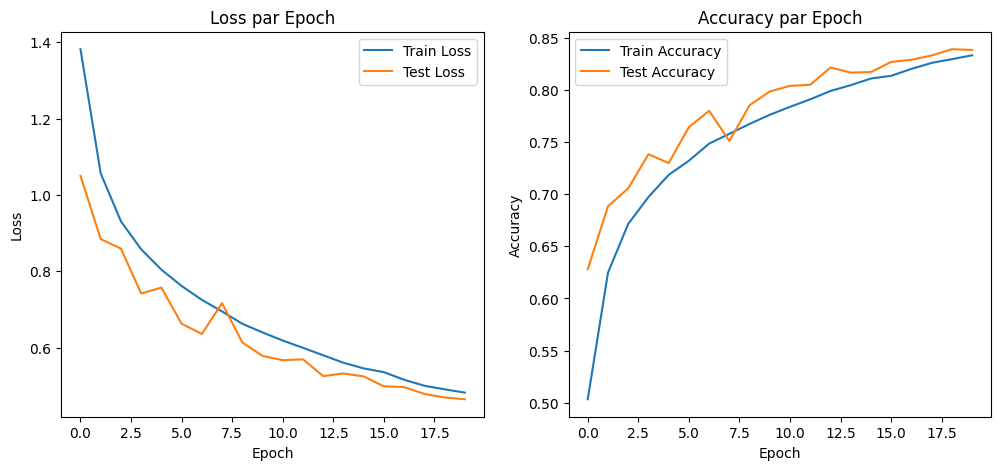

In [274]:
def show_result(train_losses, train_accuracies, test_losses, test_accuracies):
    plt.figure(figsize=(12,5))

    # Loss
    plt.subplot(1,2,1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.title('Loss par Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1,2,2)
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.title('Accuracy par Epoch')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

show_result(train_losses, train_accuracies, test_losses, test_accuracies)

### ResNet-18

In [275]:
from torchvision import datasets, transforms, models

# Charger le modèle préentraîné ResNet18
model_RN = resnet18(pretrained=True)

# Geler les poids des couches initiales
for param in model_RN.parameters():
    param.requires_grad = False

print(model_RN)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

c:\Users\Utilisateur\Simplon\CONV_NN\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Utilisateur\Simplon\CONV_NN\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [276]:
model_RN.fc = nn.Linear(512, 10)
model_RN.conv1 = nn.Conv2d(
    3, 64, kernel_size=3, stride=1, padding=1, bias=False
)
model_RN.maxpool = nn.Identity()

model_RN = model_RN.to(device)

In [277]:
criterion = nn.CrossEntropyLoss()           # pour classification multi-classes
optimizer = torch.optim.SGD(
    model_RN.parameters(),
    lr=0.001,
    momentum=0.9,
    weight_decay=5e-4
)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer, T_max=num_epochs
)

In [278]:
num_epochs = 30

train_losses, train_accuracies, test_losses, test_accuracies = train(model_RN, criterion, optimizer, scheduler, num_epochs)

Epoch 1/30 | Train Loss: 1.7978 | Train Acc: 0.3638 | Test Loss: 1.5505 | Test Acc: 0.4675
Epoch 2/30 | Train Loss: 1.4537 | Train Acc: 0.4977 | Test Loss: 1.3878 | Test Acc: 0.5233
Epoch 3/30 | Train Loss: 1.3459 | Train Acc: 0.5334 | Test Loss: 1.3123 | Test Acc: 0.5472
Epoch 4/30 | Train Loss: 1.2889 | Train Acc: 0.5561 | Test Loss: 1.2627 | Test Acc: 0.5631
Epoch 5/30 | Train Loss: 1.2441 | Train Acc: 0.5702 | Test Loss: 1.2323 | Test Acc: 0.5769
Epoch 6/30 | Train Loss: 1.2183 | Train Acc: 0.5783 | Test Loss: 1.2223 | Test Acc: 0.5814
Epoch 7/30 | Train Loss: 1.1969 | Train Acc: 0.5862 | Test Loss: 1.1799 | Test Acc: 0.5952
Epoch 8/30 | Train Loss: 1.1757 | Train Acc: 0.5916 | Test Loss: 1.1668 | Test Acc: 0.5958
Epoch 9/30 | Train Loss: 1.1567 | Train Acc: 0.6031 | Test Loss: 1.1493 | Test Acc: 0.6097
Epoch 10/30 | Train Loss: 1.1449 | Train Acc: 0.6046 | Test Loss: 1.1405 | Test Acc: 0.6126
Epoch 11/30 | Train Loss: 1.1294 | Train Acc: 0.6095 | Test Loss: 1.1498 | Test Acc: 0.60

In [279]:
inputs, labels = next(iter(trainloader))
print(inputs.shape)
print(model_RN.conv1)
print(model_RN.maxpool)
print(inputs.min(), inputs.max())  # должны быть около -1..1 после Normalize
print(inputs.mean([0,2,3]), inputs.std([0,2,3]))  # mean ~0, std ~1

torch.Size([128, 3, 32, 32])
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
Identity()
tensor(-2.4291) tensor(2.7537)
tensor([-0.2976, -0.3087, -0.2559]) tensor([1.4254, 1.4362, 1.4426])


In [280]:
weights = model_RN.conv1.weight.data
print(weights.shape)  # torch.Size([64, 3, 3, 3])
print(weights.mean(), weights.std())  # среднее и стандартное отклонение

torch.Size([64, 3, 3, 3])
tensor(0.0042, device='cuda:0') tensor(0.1149, device='cuda:0')


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x00000138F905F420>
Traceback (most recent call last):
  File "c:\Users\Utilisateur\Simplon\CONV_NN\.venv\Lib\site-packages\torch\utils\data\dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "c:\Users\Utilisateur\Simplon\CONV_NN\.venv\Lib\site-packages\torch\utils\data\dataloader.py", line 1562, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
                                   ^^^^^^^^^^^^^^^^^^^^
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


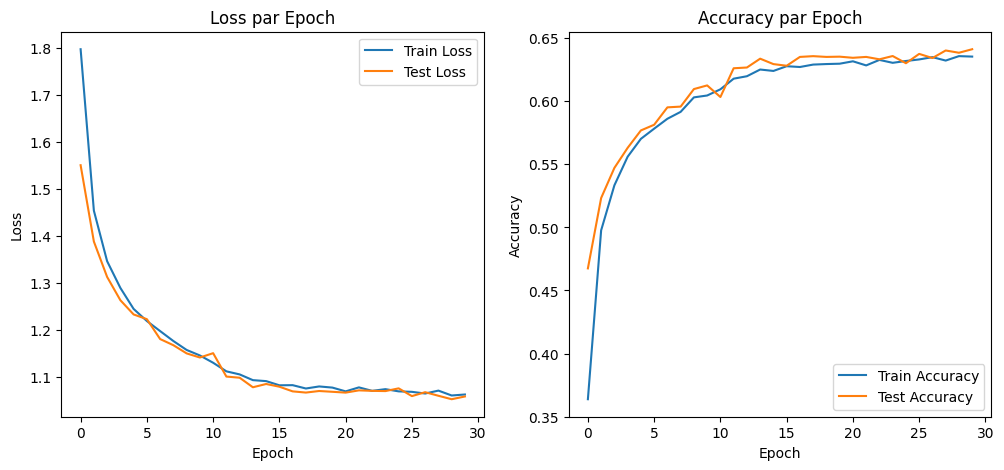

In [281]:
show_result(train_losses, train_accuracies, test_losses, test_accuracies)

In [282]:
criterion = nn.CrossEntropyLoss()           
optimizer = torch.optim.SGD(
    model_RN.parameters(),
    lr=0.0001,
    momentum=0.9,
    weight_decay=5e-4
)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer, T_max=num_epochs
)

train_losses, train_accuracies, test_losses, test_accuracies = train(model_RN, criterion, optimizer, scheduler, num_epochs)

Epoch 1/30 | Train Loss: 1.0458 | Train Acc: 0.6385 | Test Loss: 1.0335 | Test Acc: 0.6522
Epoch 2/30 | Train Loss: 1.0392 | Train Acc: 0.6428 | Test Loss: 1.0336 | Test Acc: 0.6455
Epoch 3/30 | Train Loss: 1.0435 | Train Acc: 0.6419 | Test Loss: 1.0263 | Test Acc: 0.6487
Epoch 4/30 | Train Loss: 1.0354 | Train Acc: 0.6446 | Test Loss: 1.0236 | Test Acc: 0.6510
Epoch 5/30 | Train Loss: 1.0357 | Train Acc: 0.6478 | Test Loss: 1.0255 | Test Acc: 0.6478
Epoch 6/30 | Train Loss: 1.0302 | Train Acc: 0.6468 | Test Loss: 1.0244 | Test Acc: 0.6472
Epoch 7/30 | Train Loss: 1.0270 | Train Acc: 0.6492 | Test Loss: 1.0196 | Test Acc: 0.6509
Epoch 8/30 | Train Loss: 1.0253 | Train Acc: 0.6488 | Test Loss: 1.0134 | Test Acc: 0.6535
Epoch 9/30 | Train Loss: 1.0226 | Train Acc: 0.6493 | Test Loss: 1.0114 | Test Acc: 0.6524
Epoch 10/30 | Train Loss: 1.0209 | Train Acc: 0.6504 | Test Loss: 1.0192 | Test Acc: 0.6512
Epoch 11/30 | Train Loss: 1.0231 | Train Acc: 0.6481 | Test Loss: 1.0225 | Test Acc: 0.64

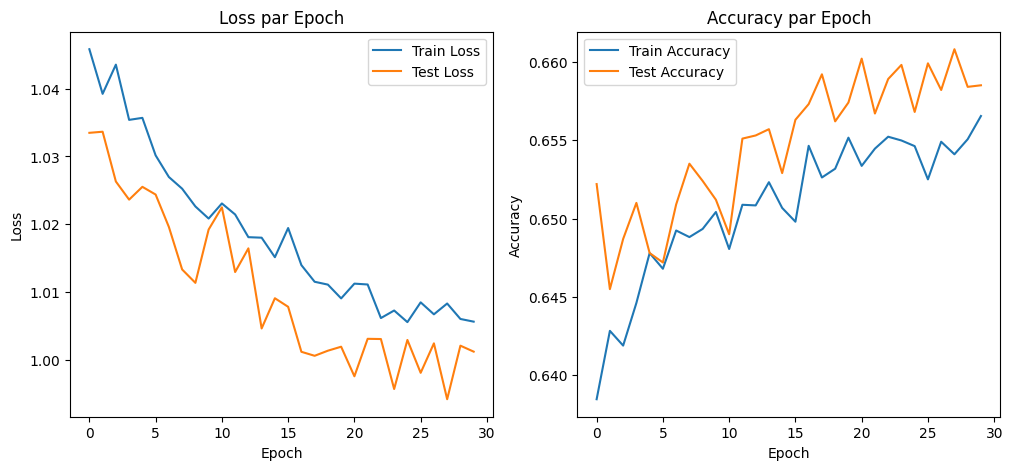

In [283]:
show_result(train_losses, train_accuracies, test_losses, test_accuracies) 

In [ ]:
criterion = nn.CrossEntropyLoss()           
optimizer = torch.optim.SGD(
    model_RN.parameters(),
    lr=0.001,
    momentum=0.9,
    weight_decay=5e-4
)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer, T_max=num_epochs
)

train_losses, train_accuracies, test_losses, test_accuracies = train(model_RN, criterion, optimizer, scheduler, num_epochs)